<a href="https://colab.research.google.com/github/rohit28900/Epilepsy_project/blob/main/Epilepsy_project_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the CHB-MIT dataset**

In [1]:
!wget -r -N -c -np https://physionet.org/files/chbmit/1.0.0/chb01/

--2022-02-11 09:51:39--  https://physionet.org/files/chbmit/1.0.0/chb01/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/chbmit/1.0.0/chb01/index.html’

physionet.org/files     [ <=>                ]   6.01K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2022-02-11 09:51:39 (512 MB/s) - ‘physionet.org/files/chbmit/1.0.0/chb01/index.html’ saved [6159]

Loading robots.txt; please ignore errors.
--2022-02-11 09:51:39--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2022-02-11 09:51:39 (6.94 MB/s) - ‘physionet.org/robots.txt’ saved [22/22]

-

In [2]:
!pip install git+https://github.com/forrestbao/pyeeg.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-lvhi8__l
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-lvhi8__l
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28131 sha256=50f3edbaa7dc9e577b798cda0bdceff4a6a0f87e1fb84c2593a858c029da808b
  Stored in directory: /tmp/pip-ephem-wheel-cache-4rthhugx/wheels/b0/23/e4/703c908bda656959957029fa145879aa79307b2545a2ef0271
Successfully built pyeeg


In [3]:
!pip install mne

     |████████████████████████████████| 7.4 MB 5.2 MB/s 


In [4]:
!pip install antropy

     |████████████████████████████████| 49 kB 2.8 MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16159 sha256=404944b3dd45eb17c5655f9c618478a340f218b552c1e184a22b9ccad1b8e940
  Stored in directory: /root/.cache/pip/wheels/d4/cc/6b/28fa7036bdabc6f1f92fd6a108ae259dbb48f107f676d6b491
Successfully built antropy


**importing Libraries**

In [5]:
import os
import glob
import mne
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import mean
from scipy import signal
from scipy.stats import kurtosis, skew
from scipy.signal import argrelextrema, welch
from scipy.integrate import cumtrapz
import statistics as s 
import antropy as ant
import time
import csv
import math
import pyeeg

In [7]:
folder = (r"/content/physionet.org/files/chbmit/1.0.0/chb01")
files = [file for file in os.listdir(folder) if file.endswith(".edf")]
print(files)

['chb01_22.edf', 'chb01_14.edf', 'chb01_02.edf', 'chb01_36.edf', 'chb01_01.edf', 'chb01_16.edf', 'chb01_43.edf', 'chb01_09.edf', 'chb01_13.edf', 'chb01_29.edf', 'chb01_26.edf', 'chb01_06.edf', 'chb01_23.edf', 'chb01_39.edf', 'chb01_20.edf', 'chb01_18.edf', 'chb01_31.edf', 'chb01_24.edf', 'chb01_25.edf', 'chb01_42.edf', 'chb01_30.edf', 'chb01_08.edf', 'chb01_33.edf', 'chb01_40.edf', 'chb01_34.edf', 'chb01_07.edf', 'chb01_03.edf', 'chb01_17.edf', 'chb01_38.edf', 'chb01_21.edf', 'chb01_32.edf', 'chb01_15.edf', 'chb01_10.edf', 'chb01_19.edf', 'chb01_27.edf', 'chb01_41.edf', 'chb01_46.edf', 'chb01_37.edf', 'chb01_12.edf', 'chb01_04.edf', 'chb01_05.edf', 'chb01_11.edf']


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:

import re
 # printing original list
print("The original list is : " + str(files))
 
files.sort(key=lambda files : list(
    map(int, re.findall(r'\d+', files)))[1])
 
# printing result
print("Strings after numerical Sort  : " + str(files))

The original list is : ['chb01_22.edf', 'chb01_14.edf', 'chb01_02.edf', 'chb01_36.edf', 'chb01_01.edf', 'chb01_16.edf', 'chb01_43.edf', 'chb01_09.edf', 'chb01_13.edf', 'chb01_29.edf', 'chb01_26.edf', 'chb01_06.edf', 'chb01_23.edf', 'chb01_39.edf', 'chb01_20.edf', 'chb01_18.edf', 'chb01_31.edf', 'chb01_24.edf', 'chb01_25.edf', 'chb01_42.edf', 'chb01_30.edf', 'chb01_08.edf', 'chb01_33.edf', 'chb01_40.edf', 'chb01_34.edf', 'chb01_07.edf', 'chb01_03.edf', 'chb01_17.edf', 'chb01_38.edf', 'chb01_21.edf', 'chb01_32.edf', 'chb01_15.edf', 'chb01_10.edf', 'chb01_19.edf', 'chb01_27.edf', 'chb01_41.edf', 'chb01_46.edf', 'chb01_37.edf', 'chb01_12.edf', 'chb01_04.edf', 'chb01_05.edf', 'chb01_11.edf']
Strings after numerical Sort  : ['chb01_01.edf', 'chb01_02.edf', 'chb01_03.edf', 'chb01_04.edf', 'chb01_05.edf', 'chb01_06.edf', 'chb01_07.edf', 'chb01_08.edf', 'chb01_09.edf', 'chb01_10.edf', 'chb01_11.edf', 'chb01_12.edf', 'chb01_13.edf', 'chb01_14.edf', 'chb01_15.edf', 'chb01_16.edf', 'chb01_17.edf',

In [10]:
len(files)

42

In [11]:
Sizures1=['chb01_03.edf','chb01_04.edf','chb01_15.edf','chb01_16.edf','chb01_18.edf','chb01_21.edf','chb01_26.edf']

In [12]:
Sizures6=['chb06_01.edf','chb06_01.edf','chb06_01.edf','chb06_04.edf','chb06_04.edf','chb06_09.edf','chb06_10.edf','chb06_13.edf','chb06_18.edf','chb06_24.edf']

In [13]:
!pip install ipdb

     |████████████████████████████████| 792 kB 5.2 MB/s 
     |████████████████████████████████| 380 kB 67.5 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=fd1d5eb16c5e885efcdda8634edf98464a801fed13ff1f2f07a651e6ea73181a
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 

In [14]:
sizure_time = pd.read_excel('/content/drive/MyDrive/Rohit Data Set/Sizure_index.xlsx')

In [15]:
sizure_index = sizure_time.rename(columns = {'Unnamed: 0': 'patient_file'}, inplace = False)

In [16]:
sizure_index

,patient_file,Unnamed: 1,Start time,Stop time,Start_index,stop_index
0,chb01_03.edf,NaN,2996,3036,749000,759000
1,chb01_04.edf,NaN,1467,1494,366750,373500
2,chb01_15.edf,NaN,1732,1772,433000,443000
3,chb01_16.edf,NaN,1015,1066,253750,266500
4,chb01_18.edf,NaN,1720,1810,430000,452500
...,...,...,...,...,...,...
193,chb24_13.edf,NaN,3288,3304,822000,826000
194,chb24_14.edf,NaN,1939,1966,484750,491500
195,chb24_15.edf,NaN,3552,3569,888000,892250
196,chb24_17.edf,NaN,3515,3581,878750,895250


In [17]:
patient_dict= {'chb01_03.edf':(749000,759000), 'chb01_04.edf':(366750,373500),'chb01_15.edf':(433000,443000),'chb01_16.edf':(253750,266500),'chb01_18.edf':(430000,452500),'chb01_21.edf':(81750,105000),'chb01_26.edf':(465500,490750)}

In [18]:
patient_dict_06= {'chb06_01.edf':([431000,434500],[1865250,1869000],[3381250,3385000]),'chb06_04.edf':([81750,86750],[1552750,1557750]),'chb06_09.edf':([3125000,3129000]),'chb06_10.edf':([2708250,2711250]),'chb06_13.edf':([126500,129750]),'chb06_18.edf':([1949750,1952750]),'chb06_24.edf':([2346750,2350750])}

In [19]:
index = patient_dict_06['chb06_09.edf']

In [23]:
#reading the CHB-MIT data
#import ipdb
f="/content/physionet.org/files/chbmit/1.0.0/chb01/"
patient_data = pd.DataFrame()
for i in range(0,len(files)):

  loc = (f+files[i])
  #for j in range(0,len(Sizures)):
  #sizure = (f+Sizures[j])
  raw = mne.io.read_raw_edf(loc, preload=True)
  temp = raw.to_data_frame()
  temp['label'] = 0
  
  #ipdb.set_trace(context=6)    
  if(files[i] in Sizures6):

    index = patient_dict_06[files[i]]


    try:
      [rows,cols] = np.shape(index)
    except ValueError:
      cols = 0


    #ipdb.set_trace(context=6)
    if rows > 0 and cols == 0: 
      #ipdb.set_trace(context=6)  
      temp['label'].iloc[index[0]:index[1]] = 1

    if cols > 2:
      for i in range(0,len(cols)):

        temp['label'].iloc[index[i][0]:index[i][1]] = 1
        #ipdb.set_trace(context=6)
  


    
  patient_data = pd.concat([patient_data,temp], axis=0)
      




  #ipdb.set_trace(context=6)
  #header = ','.join(raw.ch_names)
  #np.savetxt('chb01.csv', raw.get_data().T, delimiter=',', header=header)
  #i+=1






Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 681727  =      0.000 ...  2662.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 595199  =      0.000 ...  2324.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153599  =      0.000 ...   599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb01/chb01_46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-23-66817f887203>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(loc, preload=True)


In [ ]:
raw.plot_psd(fmax=60)
raw.plot(duration=50, n_channels=2);

In [25]:
temp.tail()

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,C4-P4,P4-O2,FP2-F8,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,label
921595,3599980,-4.102564,-7.228327,7.619048,7.228327,11.526252,13.089133,-0.195360,-21.684982,43.956044,31.062271,10.354090,-29.890110,13.479853,6.837607,35.360195,-1.367521,44.346764,70.134310,-7.228327,-4.884005,-8.400488,12.698413,35.360195,0
921596,3599984,-0.976801,-8.791209,11.135531,9.963370,15.042735,16.214896,2.539683,-22.466422,37.313797,30.671551,11.526252,-24.810745,13.479853,0.195360,35.360195,4.493284,57.631258,85.372405,-10.744811,-2.539683,-8.009768,13.089133,35.360195,0
921597,3599988,9.181929,-9.181929,4.493284,7.619048,27.155067,20.903541,-2.539683,-32.234432,28.717949,42.783883,10.744811,-25.592186,1.367521,11.135531,38.485958,4.493284,-5.274725,-3.321123,-4.102564,-8.009768,-9.181929,12.307692,38.485958,0
921598,3599992,16.605617,-7.228327,3.321123,2.148962,36.532357,27.155067,-7.228327,-41.611722,24.029304,50.598291,10.354090,-24.420024,-6.056166,19.340659,38.876679,7.228327,-26.373626,-21.294261,-2.930403,-17.777778,-11.526252,13.479853,38.876679,0
921599,3599996,15.042735,-2.539683,6.837607,6.446886,30.671551,33.406593,-0.195360,-38.095238,49.426129,21.684982,13.479853,-18.559219,9.572650,1.758242,40.048840,12.698413,32.625153,38.485958,-6.446886,-13.479853,-19.731380,12.698413,40.048840,0


In [26]:
patient_data.tail()

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,C4-P4,P4-O2,FP2-F8,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,label
921595,3599980,-4.102564,-7.228327,7.619048,7.228327,11.526252,13.089133,-0.195360,-21.684982,43.956044,31.062271,10.354090,-29.890110,13.479853,6.837607,35.360195,-1.367521,44.346764,70.134310,-7.228327,-4.884005,-8.400488,12.698413,35.360195,0
921596,3599984,-0.976801,-8.791209,11.135531,9.963370,15.042735,16.214896,2.539683,-22.466422,37.313797,30.671551,11.526252,-24.810745,13.479853,0.195360,35.360195,4.493284,57.631258,85.372405,-10.744811,-2.539683,-8.009768,13.089133,35.360195,0
921597,3599988,9.181929,-9.181929,4.493284,7.619048,27.155067,20.903541,-2.539683,-32.234432,28.717949,42.783883,10.744811,-25.592186,1.367521,11.135531,38.485958,4.493284,-5.274725,-3.321123,-4.102564,-8.009768,-9.181929,12.307692,38.485958,0
921598,3599992,16.605617,-7.228327,3.321123,2.148962,36.532357,27.155067,-7.228327,-41.611722,24.029304,50.598291,10.354090,-24.420024,-6.056166,19.340659,38.876679,7.228327,-26.373626,-21.294261,-2.930403,-17.777778,-11.526252,13.479853,38.876679,0
921599,3599996,15.042735,-2.539683,6.837607,6.446886,30.671551,33.406593,-0.195360,-38.095238,49.426129,21.684982,13.479853,-18.559219,9.572650,1.758242,40.048840,12.698413,32.625153,38.485958,-6.446886,-13.479853,-19.731380,12.698413,40.048840,0


In [27]:
 siz = list(np.where(patient_data["label"] == 1))

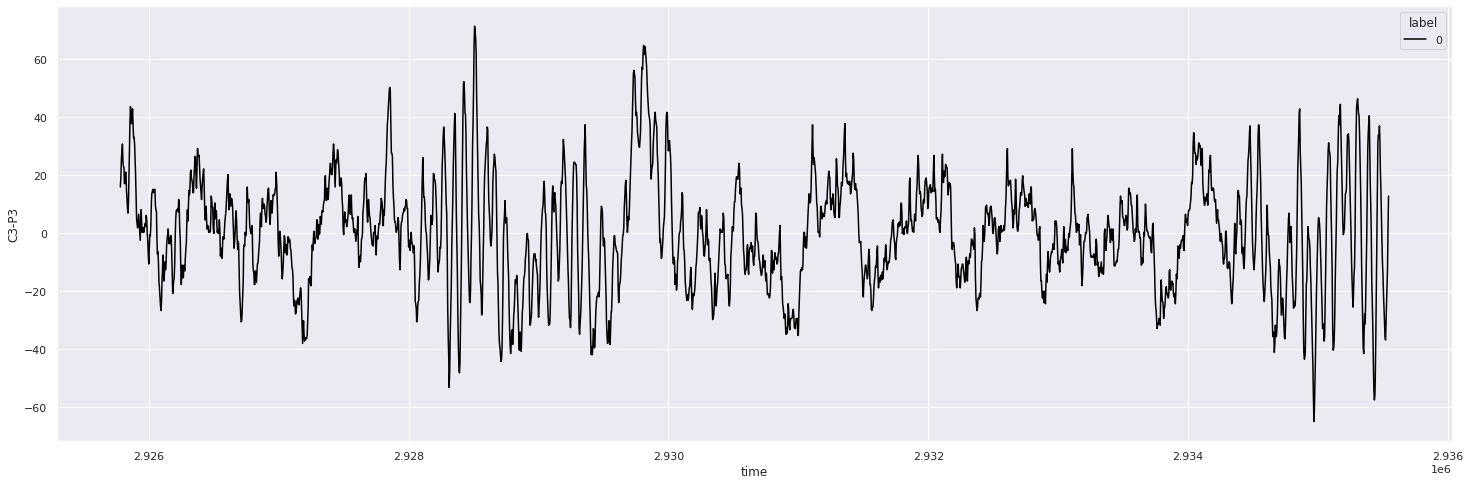

In [28]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
# Plot the responses for different events and regions
sns.lineplot(x ="time",y="C3-P3",hue='label',palette=['black'],
             data=patient_data[2592200:2594700])
fig.savefig('C3-P3_2500_1')

In [59]:
patient_data.columns

Index(['time', 'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
       'FT10-T8', 'T8-P8-1', 'label'],
      dtype='object')

In [30]:
patient_data['label'].value_counts()

0    37372928
Name: label, dtype: int64

In [31]:
#print(patient_data['label'].where(patient_data['label'] == 1))
exists = 1 in patient_data.label
print(exists)


True


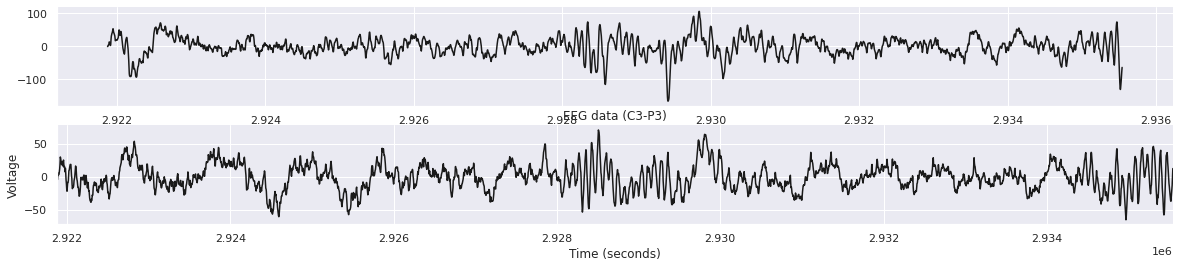

In [32]:
data =(patient_data['F3-C3'][2591200:2594700])
time = (patient_data['time'][2591200:2594700])
data1 =(patient_data['C3-P3'][2591200:2594700])
time = (patient_data['time'][2591200:2594700])
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(20, 4))
ax1.plot(time, data, lw=1.5, color='k')
ax2.plot(time, data1, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
plt.xlim([time.min(), time.max()])
plt.title('EEG data (C3-P3)')
sns.despine()
#plt.savefig('seizure_eeg')

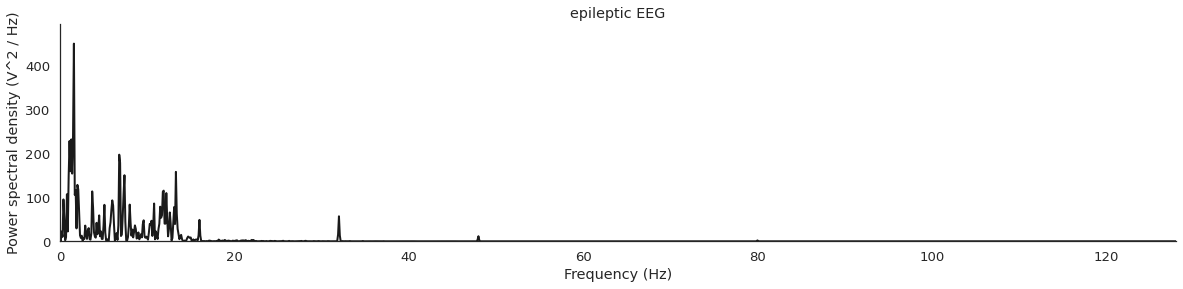

In [33]:
from scipy import signal
import math
# Define window length (10 seconds)
sf = 256
win = 10 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(20, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
#plt.xlim([0,100])
plt.title("epileptic EEG")
plt.xlim([0, freqs.max()])
sns.despine()
plt.savefig('psd_sizure_eeg')

In [34]:
len(psd)
#len(freqs)

1281

In [35]:
def countOccurrences(arr):
    a = 0
    b = 0
    res = 0
    for i in range(len(arr)):
        if 0 == arr[i]:
          a += 1
        
        elif 1 ==arr[i]:
          b +=1
          if a>=b:
            res =0
          else: 
            res =1

    return res

In [ ]:
#channels = ['F7-T7',' T7-P7','P7-O1', 'FP1-F3','F3-C3','C3-P3','P3-O1','FP2-F4','F4-C4','C4-P4','P4-O2','FP2-F8','F8-T8','P8-O2','FZ-CZ',
#'CZ-PZ','P7-T7','T7-FT9','FT9-FT10', 'FT10-T8','T8-P8','FP1-F7']

**Function for features**

In [36]:
import math

In [38]:
import ipdb
def mean_eeg(ep):
  #eeg_mean = []
  #ipdb.set_trace(context=6)
  df1 = mean(ep)
  #eeg_mean.append(df1)
  return df1


In [39]:
def median_eeg(df):
  eeg_median = []
  df1 = s.median(df)
  eeg_median.append(df1)

  return eeg_median

In [40]:
def mean_variance(df):
    variance_vals = np.var(df)
    return np.mean(variance_vals)

In [41]:
def mean_kurtosis(df):
    kurtosis_vals = kurtosis(df)
    return np.mean(kurtosis_vals)

In [42]:
def mean_skewness(df):
    skew_vals = skew(df)
    return np.mean(skew_vals)

In [43]:
#Power Spectral Density
def mean_psd(df):
  from scipy import signal
  from scipy.integrate import simps
  # Define window length (4 seconds)
  win = sf
  #ipdb.set_trace(context=6)
  freqs, psd = signal.welch(df, sf, nperseg=win)
  freq_res = freqs[1] - freqs[0] 
  # Relative delta power (expressed as a percentage of total power)
  total_power = simps(psd, dx=freq_res)
  #delta_rel_power = delta_power / total_power
  return total_power


In [44]:
#Band power
def band_power(df):
  delta_power = pyeeg.bin_power(df,[0.5,4],256)
  theta_power = pyeeg.bin_power(df,[4,7],256)
  alpha_power = pyeeg.bin_power(df,[7,12],256)
  beta_power  = pyeeg.bin_power(df,[12,30],256)
  return (delta_power,theta_power, alpha_power,beta_power) 

In [45]:
#Shannon Entropy
import pandas as pd
from scipy.stats import entropy
def eeg_entropy(df):
  pd_series = pd.Series(df)
  counts = pd_series.value_counts()
  entropy1 = entropy(counts)
  return entropy1


In [46]:
#Zero crossing rata
def zero_crossing(df):
  zero_crosses = (np.nonzero(np.diff(df > 0)))[0]
  return (zero_crosses.size)


In [47]:
#Hust parameter
def hust(df):
  hust_val = pyeeg.hurst(df)
  return hust_val

In [48]:
# Phase Frequency detector
def mean_pfd(df):
    pfd_vals = ant.petrosian_fd(df)
    return pfd_vals

In [49]:
# Hajoth Parameter
def eeg_hfd(df):
  mobility, complexity = ant.hjorth_params(df)
  return mobility, complexity

In [79]:
#Function for epoching
def epoch(channel,label, epoch_size,overlapping):
  
  import math
  import ipdb
  start_index = 0
  epoch_size = math.ceil(epoch_size / 0.004)
  no_epochs = math.ceil(len(channel)/epoch_size)
  no_overlap = math.ceil(overlapping / 0.004)
  channel_epoch = pd.DataFrame()
  features_epoch = pd.DataFrame(columns =['Mean','Median','Varience','Kurtosis','Skewness','Power','Entropy',
                                          'Spectral_entropy','Zero_Crossing','Hust','Pfd','Mobility','Complexity','label'])
  sizure_label = []
  
  for i in range(0,no_epochs):
    temp1= pd.DataFrame()
    label1 = pd.DataFrame()
    if start_index != 0:
      start_index = start_index - overlapping
    stop_index = start_index+epoch_size
    
    if stop_index <= len(channel):  
      temp1 = channel[start_index:stop_index]
      label1 = label[start_index:stop_index]
      
    else:
      temp1 = channel[start_index:-1]
    #ipdb.set_trace(context=6)
    
    temp1 = temp1.reset_index(drop=True)
    label1 = label1.reset_index(drop=True)
    start_index = stop_index
    label2=label1.to_numpy()
    lab = countOccurrences(label2)
    
    sizure_label.append(abs(lab))
    label_data = pd.Series(sizure_label)
    #add temp to channel_epoch
    channel_epoch = pd.concat([channel_epoch,temp1], axis=1, ignore_index = True)
    channel_epoch = pd.concat([channel_epoch,label_data], axis=1, ignore_index = True)
    channel_epoch = channel_epoch.dropna()
    data = temp1.to_numpy()
    #ipdb.set_trace(context=6)

    #Function for featurs

    mean_vals = pd.Series(mean_eeg(channel_epoch.iloc[:,i:i+1])) #..............Mean
    mean_vals = pd.Series(mean_eeg(temp1)) #..............Mean
    median_vals = pd.Series(median_eeg(temp1)) #..........Median
    x = np.var(data)
    variance_vals = pd.Series(x) #...............Varience
    kurtosis_vals = pd.Series(kurtosis(temp1)) #..Kurtosis
    skew_vals = pd.Series(skew(temp1)) #..........Skewness
    power = pd.Series(mean_psd(data)) #...................Power
    signal_entropy = pd.Series(ant.app_entropy(data))#........Entropy
    zero_crossing_rate = pd.Series(zero_crossing(temp1))#..Zero_crossing_rate
    Hust_vals = pd.Series(hust(data))#...........Hust_vals
    spectral_entropy = pd.Series(ant.spectral_entropy(data, sf=256, method='welch', normalize=True))
    pfd_vals = pd.Series(mean_pfd(temp1))
    mobility_vals = pd.Series(eeg_hfd(temp1)[0])
    complexity_vals =pd.Series(eeg_hfd(temp1)[1])
    
    #ipdb.set_trace(context = 6)
    #temp2 = pd.DataFrame(mean_vals,median_vals, variance_vals,kurtosis_vals,skew_vals, power, signal_entropy, zero_crossing_rate, Hust_vals,label_data)
    temp2 = {'Mean' : mean_vals,
             'Median':median_vals,
             'Varience':variance_vals,
             'Kurtosis':kurtosis_vals,
             'Skewness':skew_vals,
             'Power':power,
             'Entropy':signal_entropy,
             'Spectral_entropy':spectral_entropy,
             'Zero_Crossing':zero_crossing_rate,
             'Hust':Hust_vals,
             'Pfd':pfd_vals,
             'Mobility':mobility_vals,
             'Complexity':complexity_vals,
             'label':lab
             }
    temp3 =pd.DataFrame.from_dict(temp2)
    temp2.clear()
    features_epoch = features_epoch.append(temp3, ignore_index=True)
    
    #ipdb.set_trace(context = 6)
    

    #ipdb.set_trace(context = 6)
    #del temp3

    #Band_power  = band_power(temp1)#......................Band_power
    
    features_epoch = pd.concat([mean_vals,median_vals,variance_vals,kurtosis_vals,skew_vals,power,signal_entropy,zero_crossing_rate,Hust_vals,label_data], axis=1,
                              keys =['Mean','Median','Varience','Kurtosis','Skewness','Power','Entropy','Zero-Crossing','Hust','Label']) 

  return features_epoch.to_csv('label_epoch.csv')

In [ ]:
epoch(patient_data['FP1-F7'],patient_data['label'],10,0)

In [ ]:
dv =pd.read_csv('/content/drive/MyDrive/Rohit Data Set/patients features/CHB_MIT_01.csv')

NameError: ignored

In [ ]:
dv.head()

,Epoch,Mean,Median,Varience,Kurtosis,Skewness,Power,Entropy,Spectral_entropy,Zero_Crossing,Hust,Pfd,Mobility,Complexity,label
0,0,0.315702,0.195360,293.709609,0.650111,0.244237,243.584979,0.965375,0.563809,220,0.558105,1.017736,0.271387,4.215109,0
1,1,-0.477460,-0.195360,211.184635,0.006100,-0.011966,188.543474,1.096501,0.615209,286,0.712594,1.017939,0.332927,3.452487,0
2,2,0.660943,0.586081,266.924705,0.169350,-0.003543,261.199724,0.932692,0.571226,232,0.557736,1.016307,0.279366,3.739299,0
3,3,0.131595,0.586081,273.405297,-0.301960,-0.115292,254.919126,0.905237,0.545947,165,0.586204,1.015971,0.261617,3.996424,0
4,4,0.348210,0.976801,227.138812,0.494540,-0.034210,213.185964,0.929569,0.542437,206,0.606963,1.015467,0.268427,3.912735,0


In [ ]:
data =(dv['Mean'][9200:9316])
time = (dv['Epoch'][9200:9316])
if dv[(dv['label'] ==1 ) & (dv['label'] == 0)]:
  fig, ax = plt.subplots(1, 1, figsize=(20, 4))
  plt.plot(time, data,*, lw=1.5, color='k')
  plt.xlabel('Epoch')
  plt.ylabel('Mean')
  plt.title('For epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()


ValueError: ignored

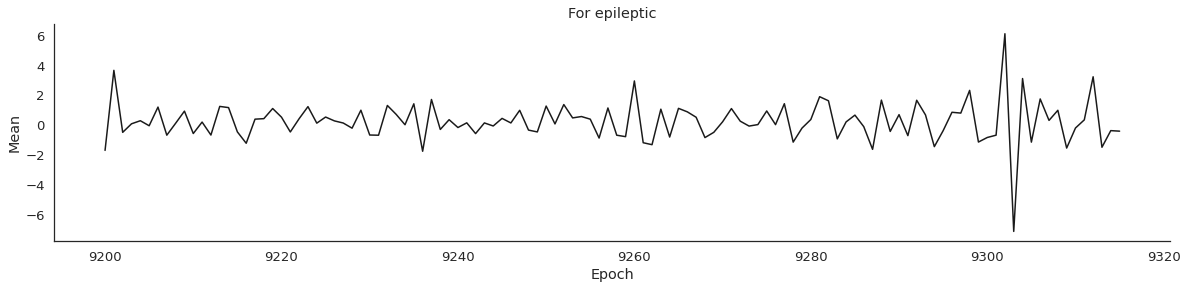

In [ ]:
data =(dv['Mean'][9200:9316])
time = (dv['Epoch'][9200:9316])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('For epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()

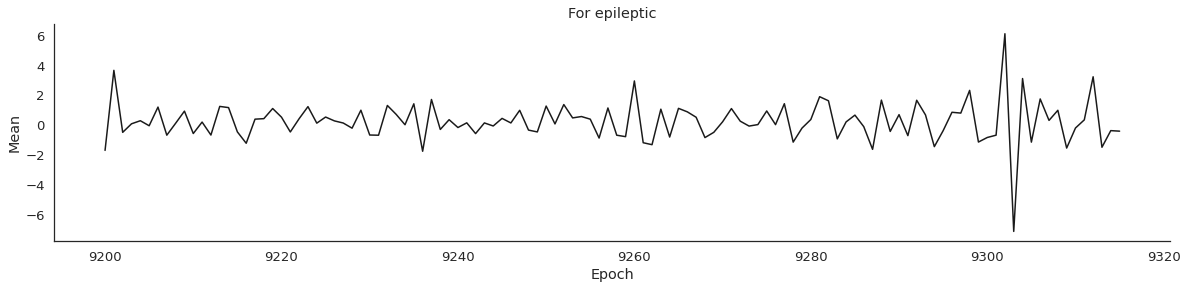

In [ ]:
data =(dv['Mean'][9200:9316])
time = (dv['Unnamed: 0'][9200:9316])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
if 
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('For epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()

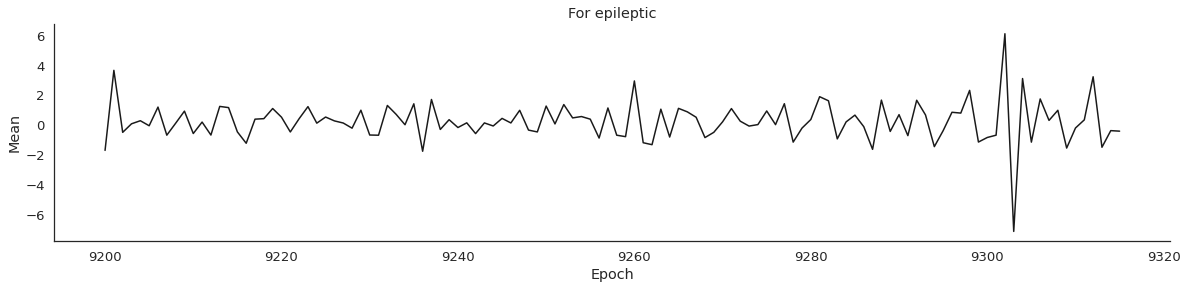

In [ ]:
data =(dv['Mean'][9200:9316])
time = (dv['Unnamed: 0'][9200:9316])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('For epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()

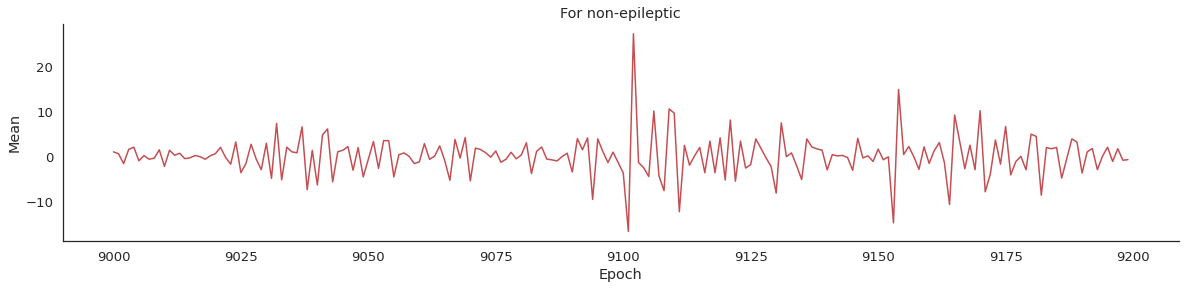

In [ ]:
data =(dv['Mean'][9000:9200])
time = (dv['Unnamed: 0'][9000:9200])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.plot(time, data, lw=1.5, color='r')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('For non-epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()

In [ ]:
x = dv.drop(['Unnamed: 0','label'],axis = 1 )

In [ ]:
x.head()

,Mean,Median,Varience,Kurtosis,Skewness,Power,Entropy,Spectral_entropy,Zero_Crossing,Hust,Pfd,Mobility,Complexity
0,0.315702,0.195360,293.709609,0.650111,0.244237,243.584979,0.965375,0.563809,220,0.558105,1.017736,0.271387,4.215109
1,-0.477460,-0.195360,211.184635,0.006100,-0.011966,188.543474,1.096501,0.615209,286,0.712594,1.017939,0.332927,3.452487
2,0.660943,0.586081,266.924705,0.169350,-0.003543,261.199724,0.932692,0.571226,232,0.557736,1.016307,0.279366,3.739299
3,0.131595,0.586081,273.405297,-0.301960,-0.115292,254.919126,0.905237,0.545947,165,0.586204,1.015971,0.261617,3.996424
4,0.348210,0.976801,227.138812,0.494540,-0.034210,213.185964,0.929569,0.542437,206,0.606963,1.015467,0.268427,3.912735


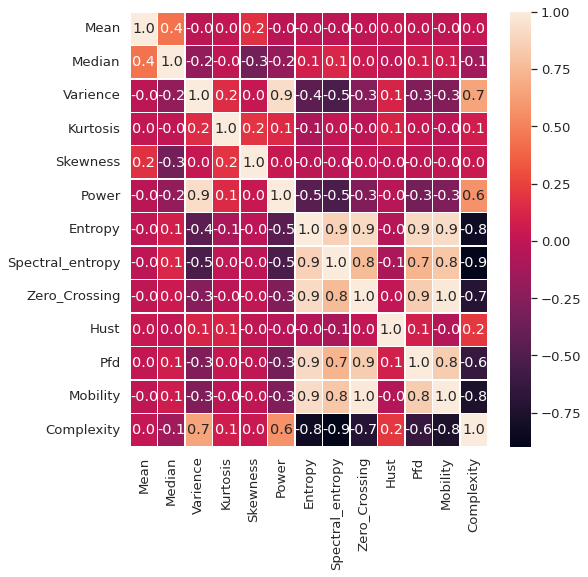

In [ ]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#plt.savefig('feature_correlation')

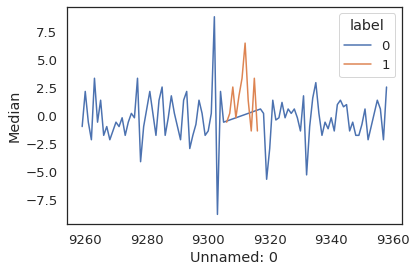

In [ ]:
sns.lineplot(data=dv[-100:], x="Unnamed: 0", y='Median',hue='label')

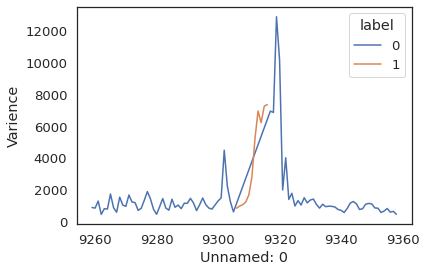

In [ ]:
sns.lineplot(data=dv[-100:], x="Unnamed: 0", y='Varience',hue='label')

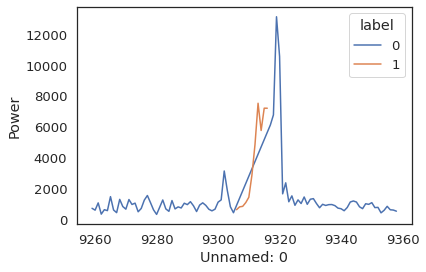

In [ ]:
sns.lineplot(data=dv[-100:], x="Unnamed: 0", y='Power',hue='label')

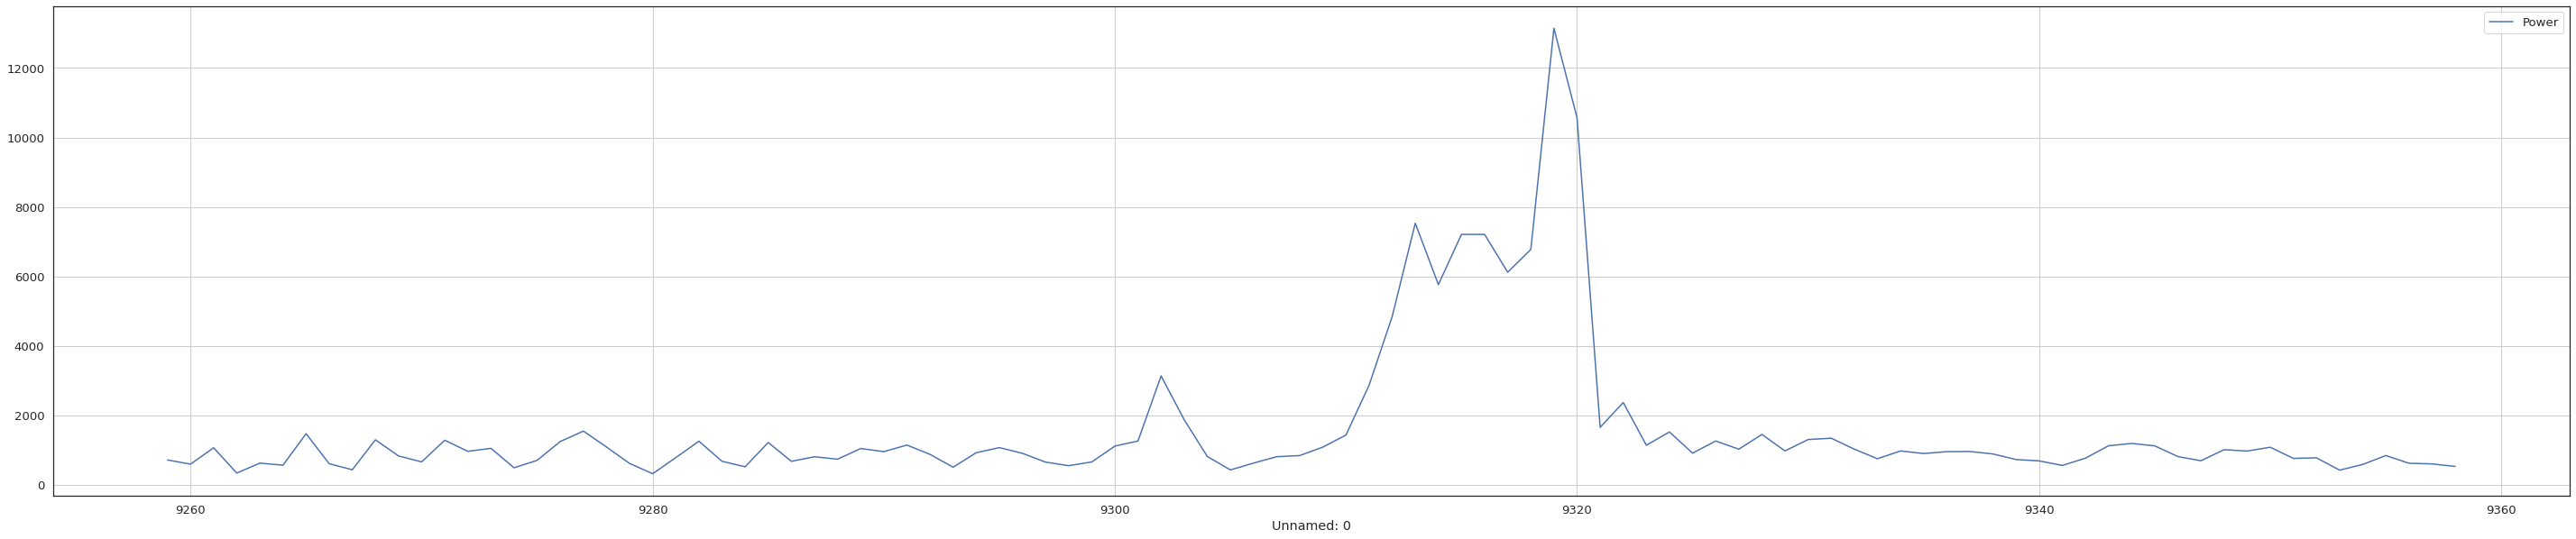

In [ ]:
dv[-100:].plot(x='Unnamed: 0', y=['Power'], figsize=(50,10), grid=True)

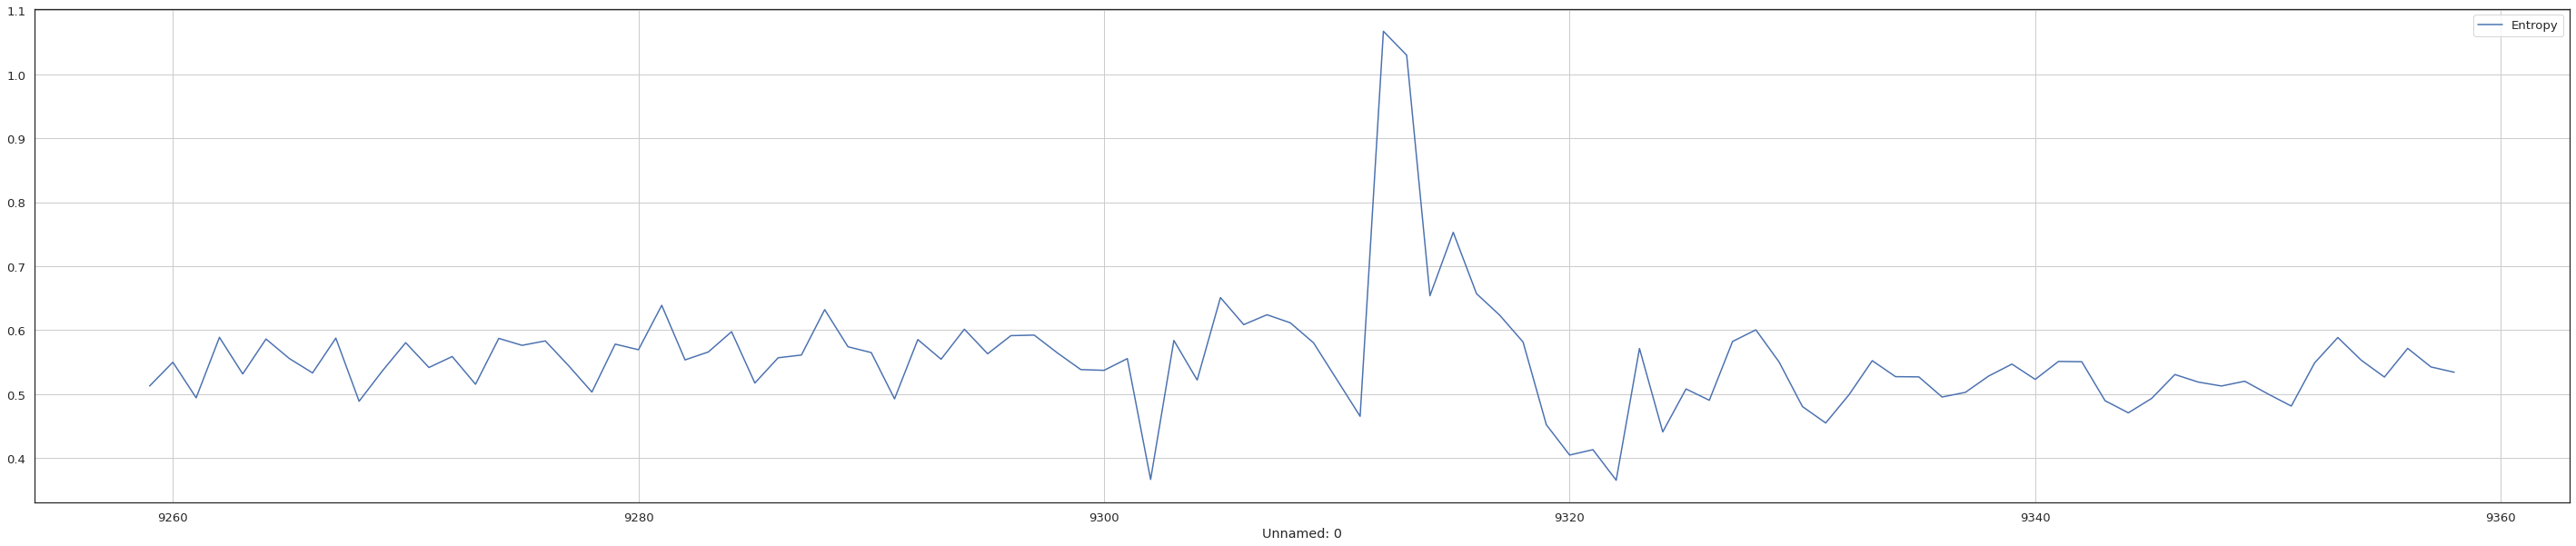

In [ ]:
dv[-100:].plot(x='Unnamed: 0', y=['Entropy'], figsize=(50,10), grid=True)

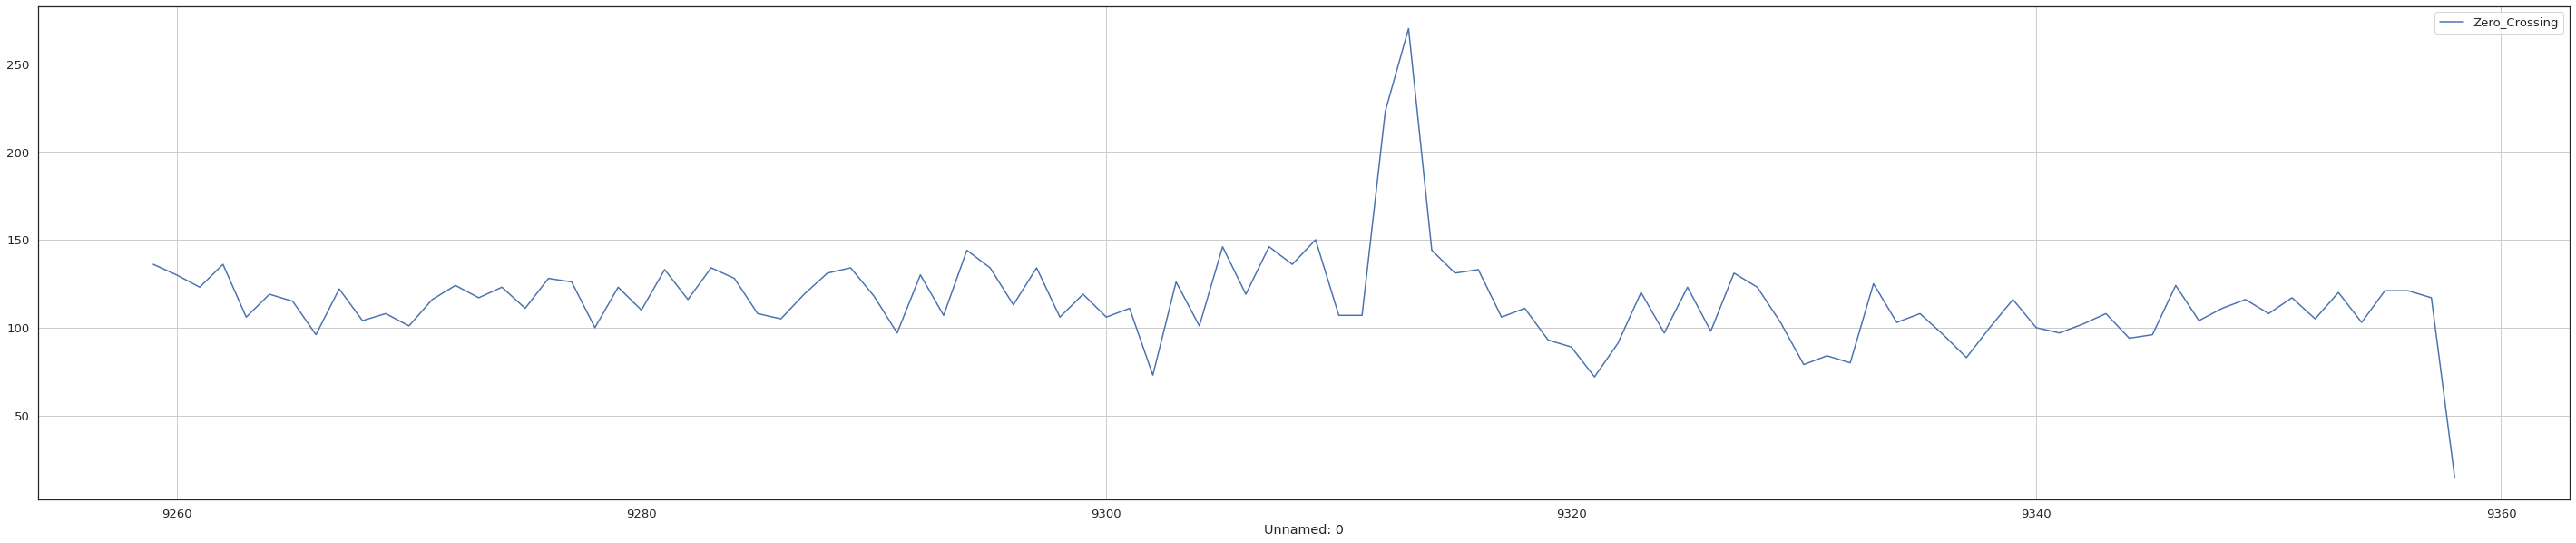

In [ ]:
dv[-100:].plot(x='Unnamed: 0', y=['Zero_Crossing'], figsize=(50,10), grid=True)

In [ ]:
epoch_df = pd.read_csv('/content/CHB_MIT_01_epoch.csv')

In [ ]:
epoch_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9319,9320,9321,9322,9323,9324,9325,9326,9327,9328,9329,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342,9343,9344,9345,9346,9347,9348,9349,9350,9351,9352,9353,9354,9355,9356,9357,9358
0,0,11.916972,0.195360,17.777778,16.605617,-7.619048,-12.698413,6.056166,2.539683,-8.791209,6.837607,-2.539683,10.744811,-13.479853,5.274725,3.321123,18.559219,1.758242,-23.247863,26.764347,15.042735,-9.181929,-12.698413,7.228327,11.135531,2.930403,-46.691087,-15.042735,-13.870574,11.916972,21.684982,-18.949939,25.592186,-0.586081,4.884005,-4.102564,18.559219,6.837607,-22.075702,-16.996337,...,107.252747,-49.816850,29.499389,44.737485,-40.048840,-62.710623,63.101343,-6.446886,-25.592186,33.797314,-67.008547,42.393162,-41.221001,0.586081,33.015873,-59.975580,34.188034,13.870574,15.433455,-34.578755,-11.135531,-44.346764,-25.592186,13.089133,5.665446,44.737485,27.545788,17.387057,8.400488,25.201465,-10.354090,-2.148962,-9.963370,58.803419,-1.367521,-13.479853,5.665446,-33.797314,-1.367521,16.996337
1,1,0.195360,2.539683,20.512821,11.916972,0.195360,-13.479853,9.181929,4.493284,-0.976801,4.493284,-2.930403,0.195360,-10.354090,0.195360,7.228327,13.479853,-2.148962,-28.717949,27.936508,9.181929,-9.181929,-13.479853,6.446886,2.148962,4.102564,-49.426129,-13.870574,-20.512821,15.042735,20.122100,-13.479853,13.479853,0.976801,6.446886,-5.665446,8.400488,12.698413,-23.638584,-16.214896,...,104.126984,-49.816850,34.188034,48.644689,-46.691087,-54.896215,65.054945,-4.493284,-23.638584,42.393162,-67.399267,48.644689,-48.253968,8.400488,33.406593,-58.803419,31.452991,14.261294,11.526252,-34.578755,-14.261294,-43.174603,-24.420024,12.698413,2.930403,42.393162,28.327228,20.903541,10.744811,22.466422,-8.400488,-0.586081,-14.652015,65.054945,-0.976801,-9.572650,0.195360,-32.625153,-1.367521,7.228327
2,2,0.195360,5.665446,18.559219,11.135531,5.274725,-14.261294,11.916972,-1.367521,0.195360,-2.148962,4.102564,-7.228327,-8.009768,-4.493284,7.619048,9.572650,-8.009768,-34.188034,32.234432,5.665446,-2.148962,-10.354090,9.572650,-1.758242,6.446886,-54.896215,-14.261294,-24.420024,19.731380,15.042735,-10.354090,4.102564,2.930403,6.446886,-7.619048,4.493284,17.777778,-24.029304,-17.387057,...,99.829060,-47.863248,35.750916,54.505495,-48.644689,-44.346764,66.617827,0.976801,-18.559219,43.956044,-67.789988,54.505495,-50.598291,11.526252,33.406593,-56.849817,32.625153,15.824176,9.181929,-33.797314,-11.916972,-36.141636,-23.638584,12.307692,2.539683,38.876679,27.936508,24.029304,17.777778,21.684982,-7.619048,-0.976801,-20.512821,67.008547,-2.539683,-7.619048,-0.976801,-30.280830,-4.102564,2.930403
3,3,0.195360,4.102564,18.168498,9.181929,6.837607,-14.652015,19.731380,-5.665446,-1.758242,-2.930403,8.400488,-8.009768,-4.884005,-9.963370,11.135531,9.572650,-9.572650,-33.015873,38.485958,5.665446,0.976801,-8.009768,10.354090,-5.665446,8.400488,-57.240537,-9.572650,-14.261294,15.824176,7.228327,-3.321123,-0.976801,2.148962,7.228327,-9.572650,1.758242,18.949939,-22.075702,-15.042735,...,97.094017,-49.035409,36.141636,65.836386,-47.863248,-36.923077,66.617827,8.400488,-12.698413,30.280830,-71.697192,62.319902,-49.035409,16.605617,35.360195,-51.379731,33.015873,15.824176,5.665446,-26.764347,-11.916972,-31.062271,-24.420024,15.042735,0.976801,33.797314,28.717949,27.155067,26.373626,20.122100,-6.056166,-0.976801,-26.373626,62.319902,-2.930403,-4.884005,-0.195360,-30.671551,-4.493284,5.665446
4,4,0.195360,-1.758242,13.870574,9.181929,10.744811,-15.824176,25.201465,-3.711844,0.586081,-3.321123,9.181929,-8.791209,-1.758242,-12.307692,7.619048,5.665446,-5.274725,-31.062271,34.188034,7.228327,5.274725,-4.493284,7.228327,-4.493284,8.791209,-62.710623,-13.479853,-14.261294,9.963370,6.056166,-6.056166,-2.930403,1.367521,6.837607,-13.089133,2.930403,22.857143,-27.936508,-21.294261,...,92.405372,-50.598291,39.267399,75.604396,-46.300366,-31.843712,60.757021,